In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
transaction = pd.read_csv('train_transaction.csv')
transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
identity = pd.read_csv('train_identity.csv')
identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [5]:
transaction_short = transaction.iloc[:,0:5]
transaction_short.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD
0,2987000,0,86400,68.5,W
1,2987001,0,86401,29.0,W
2,2987002,0,86469,59.0,W
3,2987003,0,86499,50.0,W
4,2987004,0,86506,50.0,H


In [6]:
identity_short = identity.iloc[:,[0,-2,-1]]
identity_short.head()

,TransactionID,DeviceType,DeviceInfo
0,2987004,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,mobile,iOS Device
2,2987010,desktop,Windows
3,2987011,desktop,NaN
4,2987016,desktop,MacOS


In [7]:
transaction_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   TransactionID   590540 non-null  int64  
 1   isFraud         590540 non-null  int64  
 2   TransactionDT   590540 non-null  int64  
 3   TransactionAmt  590540 non-null  float64
 4   ProductCD       590540 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 22.5+ MB


In [8]:
identity_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TransactionID  144233 non-null  int64 
 1   DeviceType     140810 non-null  object
 2   DeviceInfo     118666 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.3+ MB


In [9]:
identity_short['TransactionID'].value_counts()

3153916    1
3548654    1
3079669    1
3077620    1
3067379    1
          ..
3250108    1
3146453    1
3412695    1
3177178    1
3147777    1
Name: TransactionID, Length: 144233, dtype: int64

In [10]:
identity_short['DeviceType'].value_counts()

desktop    85165
mobile     55645
Name: DeviceType, dtype: int64

A partir de las transacciones se muestra la cantidad que se hicieron por desktop, mobile

In [11]:
joined = transaction_short.merge(identity_short,on='TransactionID')
joined.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,mobile,iOS Device
2,2987010,0,86549,75.887,C,desktop,Windows
3,2987011,0,86555,16.495,C,desktop,NaN
4,2987016,0,86620,30.000,H,desktop,MacOS


In [12]:
joined.dropna(inplace=True)
joined.count()

TransactionID     118621
isFraud           118621
TransactionDT     118621
TransactionAmt    118621
ProductCD         118621
DeviceType        118621
DeviceInfo        118621
dtype: int64

In [13]:
joined['DeviceType'].value_counts()

desktop    73450
mobile     45171
Name: DeviceType, dtype: int64

In [14]:
transaction_short['one'] = 1

In [15]:
transaction_short

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,one
0,2987000,0,86400,68.50,W,1
1,2987001,0,86401,29.00,W,1
2,2987002,0,86469,59.00,W,1
3,2987003,0,86499,50.00,W,1
4,2987004,0,86506,50.00,H,1
...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,1
590536,3577536,0,15811049,39.50,W,1
590537,3577537,0,15811079,30.95,W,1
590538,3577538,0,15811088,117.00,W,1


In [17]:
transaction_short

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,one
0,2987000,0,86400,68.50,W,1
1,2987001,0,86401,29.00,W,1
2,2987002,0,86469,59.00,W,1
3,2987003,0,86499,50.00,W,1
4,2987004,0,86506,50.00,H,1
...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,1
590536,3577536,0,15811049,39.50,W,1
590537,3577537,0,15811079,30.95,W,1
590538,3577538,0,15811088,117.00,W,1


In [19]:
transaction_short['isFraud'].value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

Text(0, 0.5, 'Cantidad')

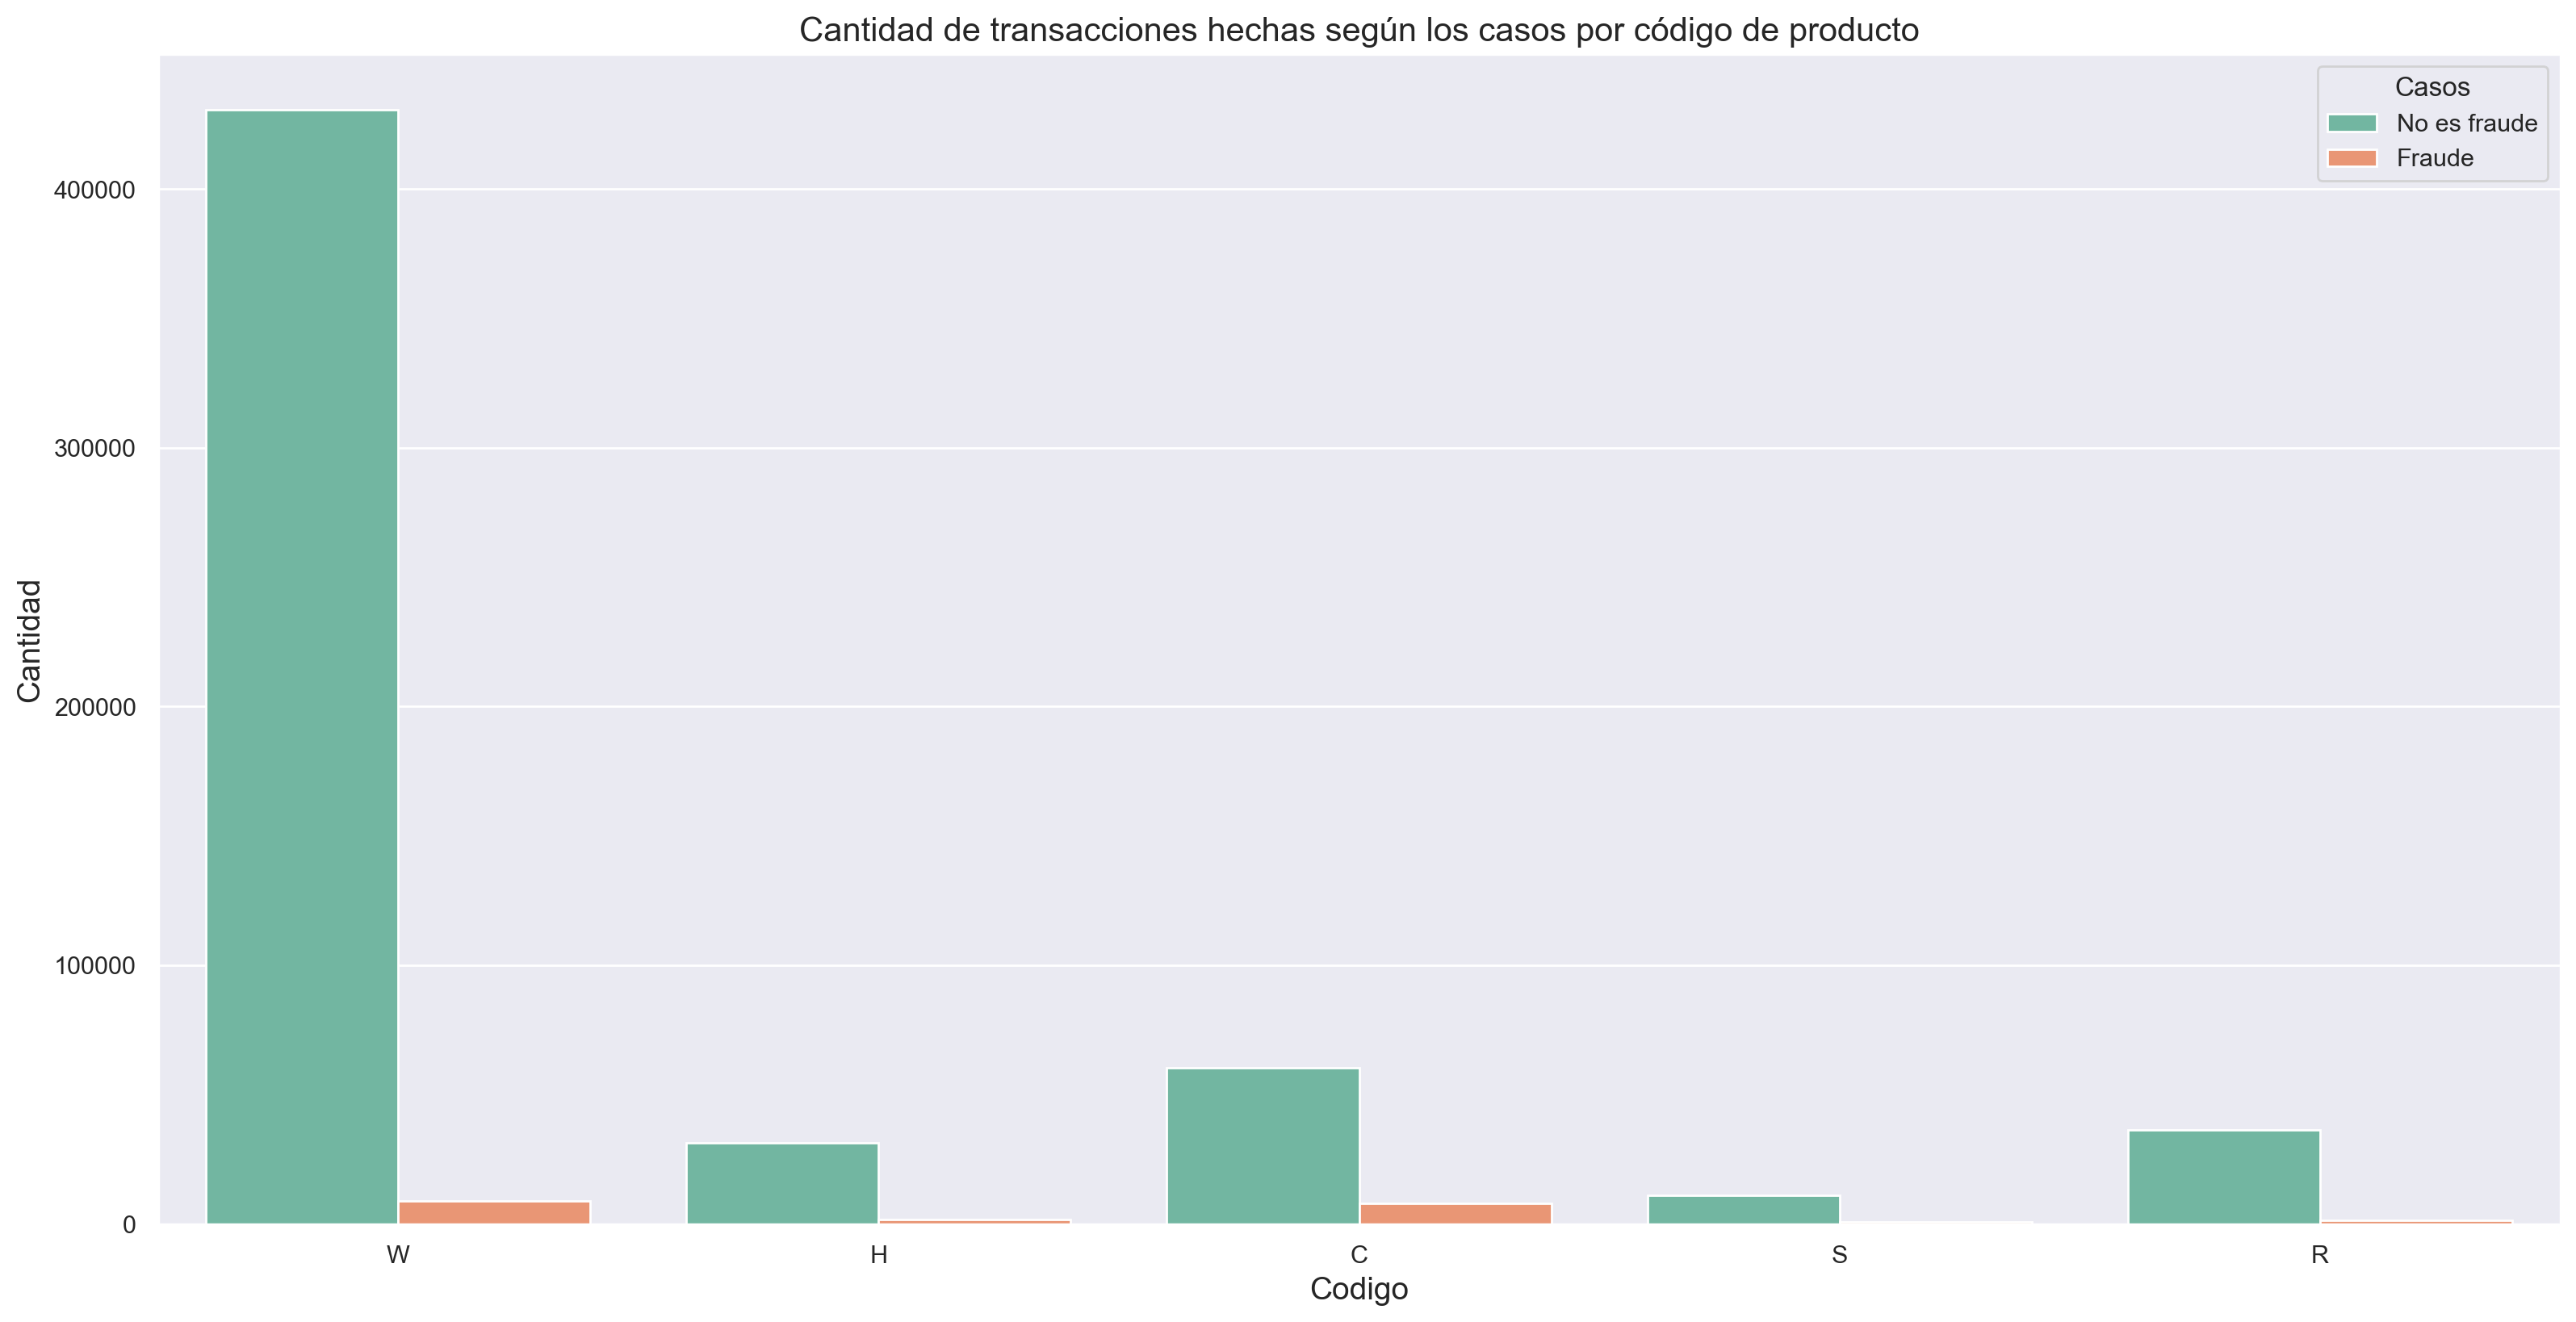

In [29]:
sns.set(rc={"figure.dpi":200,'figure.figsize':(19.2,9.6)})
ax = sns.countplot(data=transaction_short,x='ProductCD',hue='isFraud',palette='Set2')
ax.set_title("Cantidad de transacciones hechas según los casos por código de producto",fontsize=15)
plt.legend(labels=["No es fraude","Fraude"], title = "Casos")
ax.set_xlabel("Codigo",fontsize=14)
ax.set_ylabel("Cantidad",fontsize=14)